In [ ]:
import sys
import requests
import tarfile
import json
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

In [ ]:
fname = 'examples.tar.gz'
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

6461141

In [ ]:
# Extracting the dataset
tar = tarfile.open(fname)
tar.extractall()
tar.close()

In [ ]:
# Define color code
colors = {'title': (255, 0, 0),
          'text': (0, 255, 0),
          'figure': (0, 0, 255),
          'table': (255, 255, 0),
          'list': (0, 255, 255)}

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-ind is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [ ]:
def display(img,cmap='gray'):      #for displaying cropped image
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
# Function to visulaize the annotation
import pytesseract
from scipy.spatial import distance as dist
def markup(image, annotations):
    ''' Draws the segmentation, bounding box, and label of each annotation
    '''
    draw = ImageDraw.Draw(image, 'RGBA')

    for annotation in annotations:
        # Draw bbox
        
        draw.rectangle(
            (annotation['bbox'][0],
             annotation['bbox'][1],
             annotation['bbox'][0] + annotation['bbox'][2],
             annotation['bbox'][1] + annotation['bbox'][3]),
            outline=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (255,),
            width=2
        )
        #print(annotation['bbox'])
        crop_img = image.crop((annotation['bbox'][0],
             annotation['bbox'][1],
             annotation['bbox'][0] + annotation['bbox'][2],
             annotation['bbox'][1] + annotation['bbox'][3]))
        
        if(annotation['category_id']==1 or annotation['category_id']==2):
           text = pytesseract.image_to_string(crop_img)
           #print(text)

        w, h = draw.textsize(text=samples['categories'][annotation['category_id'] - 1]['name'],
                             font=font)
        if annotation['bbox'][3] < h:
            draw.rectangle(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + annotation['bbox'][2] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
        else:
            draw.rectangle(
                (annotation['bbox'][0],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
        add_text(annotation,text) 
        
    return np.array(image)

In [ ]:
def add_text(annotation,output):
  del annotation['segmentation']
  del annotation['area']
  del annotation['iscrowd']
  annotation['text']=output

In [ ]:
# Parse the JSON file and read all the images and labels
with open('examples/samples.json', 'r') as fp:
    samples = json.load(fp)
# Index images
images = {}
for image in samples['images']:
    images[image['id']] = {'file_name': "examples/" + image['file_name'], 'annotations': []}
for ann in samples['annotations']:
    images[ann['image_id']]['annotations'].append(ann)
print(images)    

{348952: {'file_name': 'examples/PMC5491943_00004.jpg', 'annotations': [{'segmentation': [[121.89, 41.8, 549.88, 41.8, 549.88, 52.31, 547.09, 52.31, 547.09, 64.31, 287.15, 64.31, 287.15, 76.3, 121.89, 76.3, 121.89, 65.8, 121.89, 65.8, 121.89, 53.8, 121.89, 41.8]], 'area': 11581.494498000131, 'iscrowd': 0, 'image_id': 348952, 'bbox': [121.89, 41.8, 427.99, 34.5], 'category_id': 1, 'id': 3398552}, {'segmentation': [[121.89, 83.47, 549.83, 83.47, 549.83, 93.97, 549.44, 93.97, 549.44, 107.46, 549.8, 107.46, 549.8, 117.97, 425.74, 117.97, 425.74, 129.97, 121.89, 129.97, 121.89, 119.46, 121.89, 107.46, 121.89, 95.47, 121.89, 83.47]], 'area': 18405.733143000223, 'iscrowd': 0, 'image_id': 348952, 'bbox': [121.89, 83.47, 427.94, 46.5], 'category_id': 1, 'id': 3398553}, {'segmentation': [[121.89, 163.31, 547.09, 163.31, 547.09, 175.51, 549.74, 175.51, 549.74, 187.71, 549.84, 187.71, 549.84, 198.22, 547.09, 198.22, 547.09, 212.1, 549.97, 212.1, 549.97, 222.61, 549.86, 222.61, 549.86, 234.81, 144.

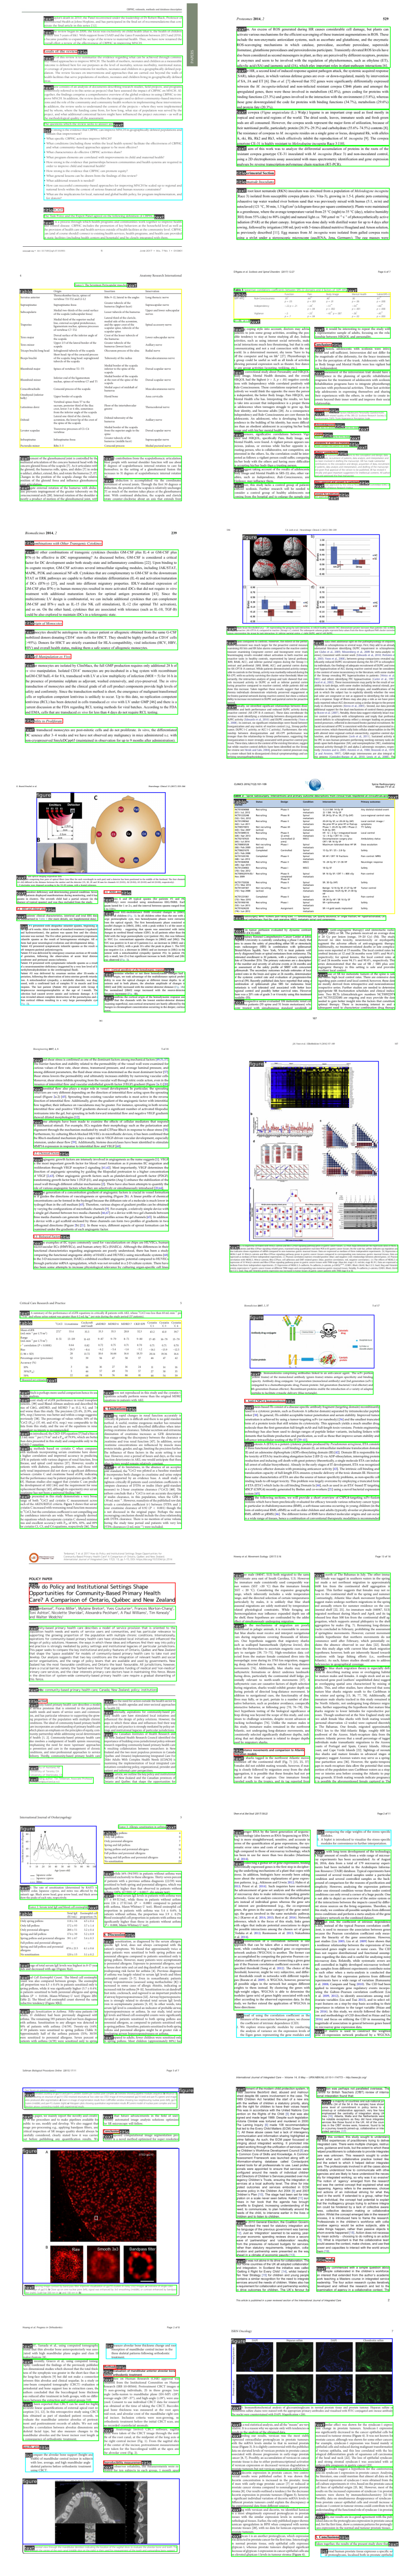

In [ ]:
# Visualize annotations
font = ImageFont.truetype("examples/DejaVuSans.ttf", 15)
fig=plt.figure(figsize=(16, 100))
import json
with open('result.json', 'w') as fp:
 for i, (_, image) in enumerate(images.items()):
    with Image.open(image['file_name']) as img:
        ax = plt.subplot(len(images) / 2, 2, i + 1)
        ax.imshow(markup(img, image['annotations']))
        ax.axis('off')
 json.dump(images, fp)      
plt.subplots_adjust(hspace=0, wspace=0)